In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

* test run with sulfolobus_islandicus

In [2]:
target_lst=["bifidobacterium", "bifidobacterium_animalis", "sulfolobus", "sulfolobus_islandicus", "bacillus"]
target=target_lst[-1]
strainFilepath="../data/{}/strain.lst".format(target)
strain_lst=[s.strip() for s in open(strainFilepath, 'r').readlines()]
print(len(strain_lst))

34


gm03759


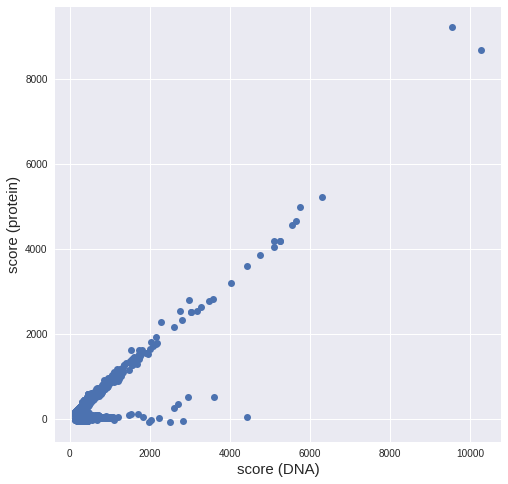

bco


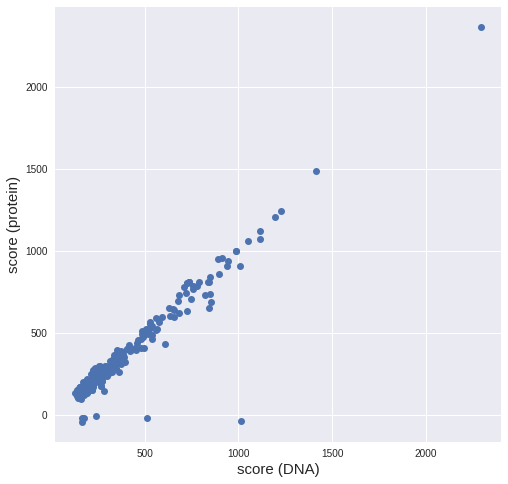

gm03154


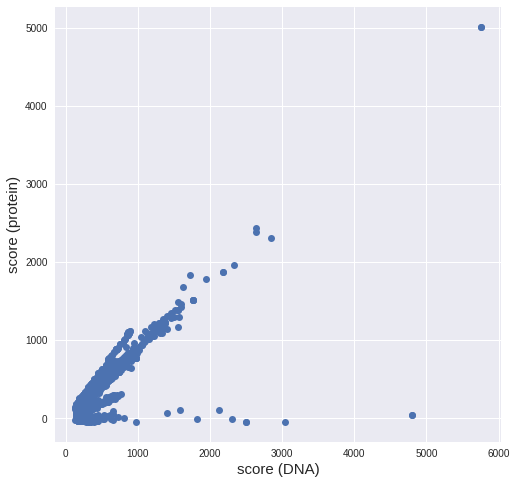

bce


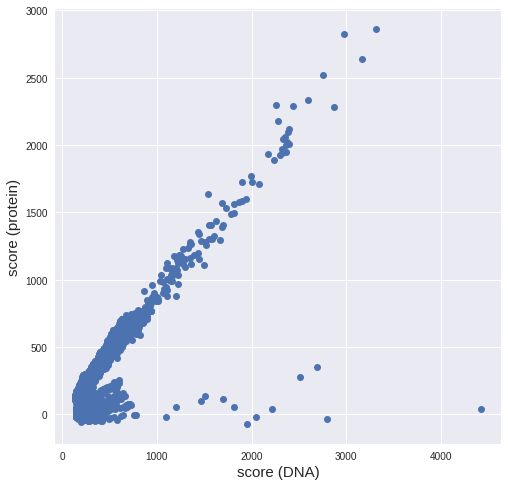

bcy


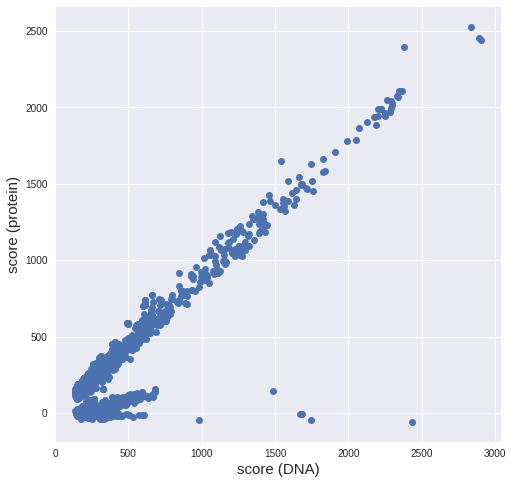

gm03781


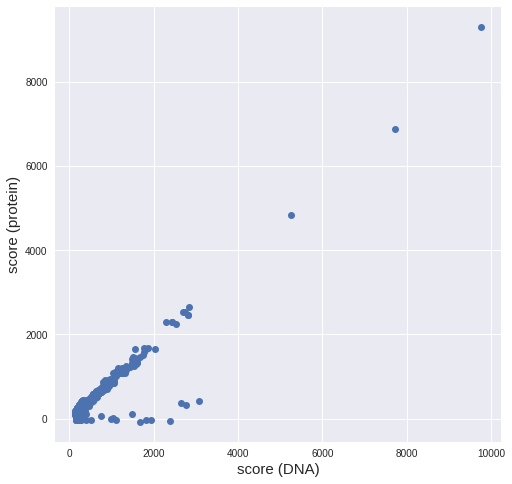

btk


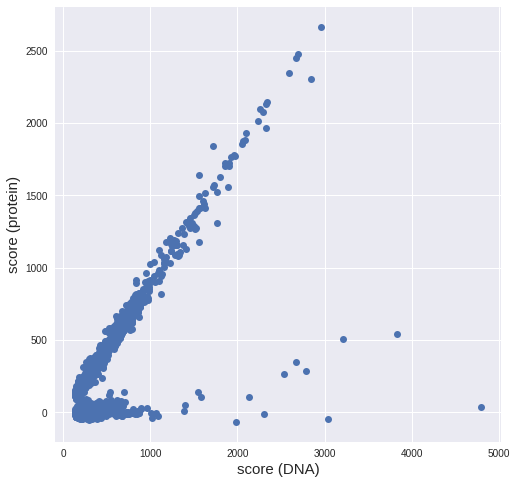

bty


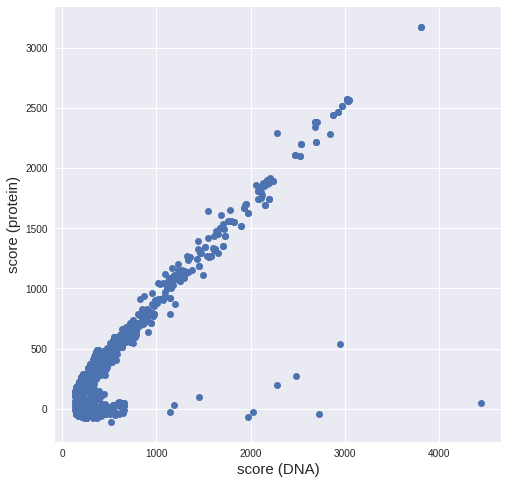

bwe


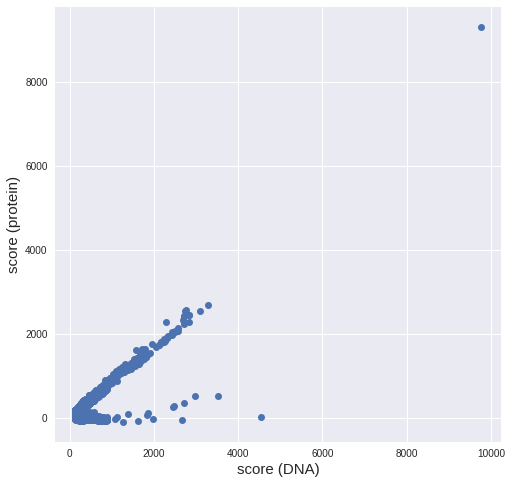

bcl


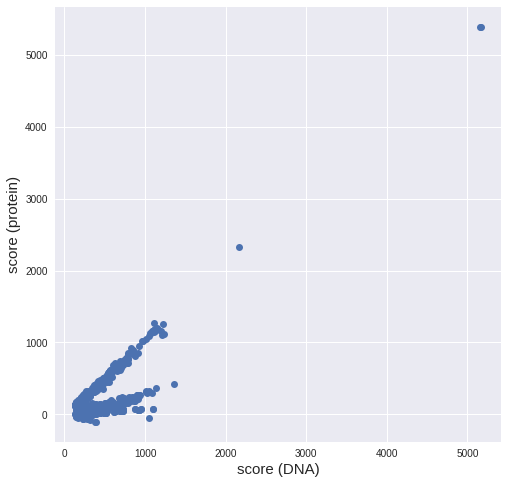

bag


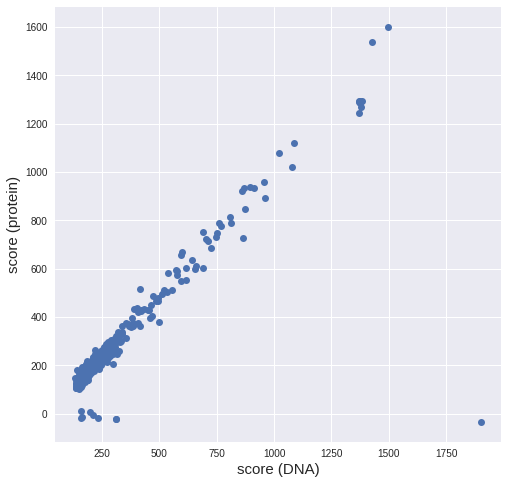

bha


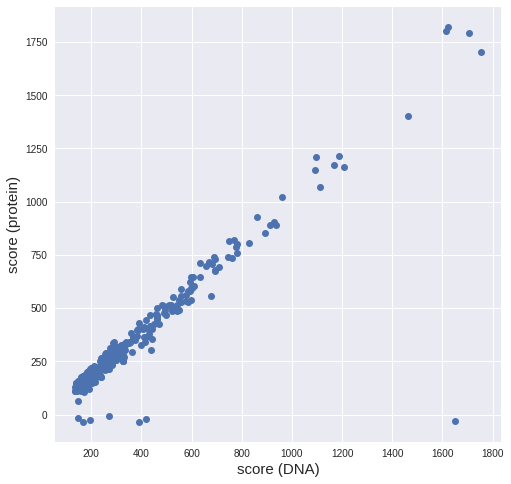

bif


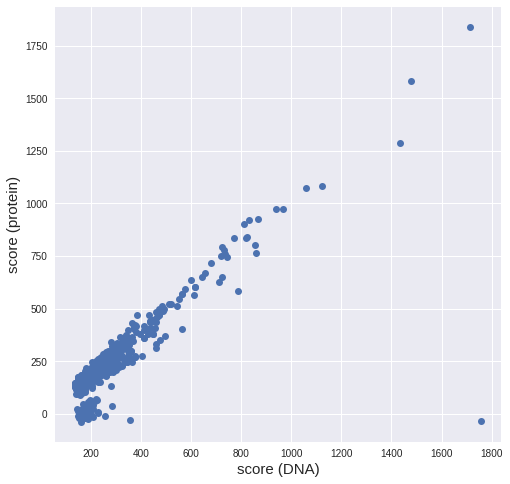

ble


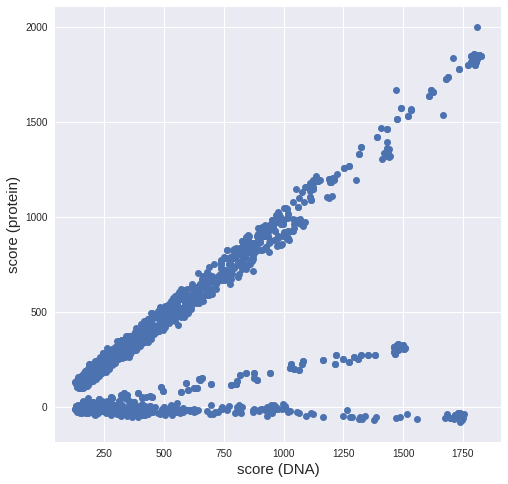

bmq


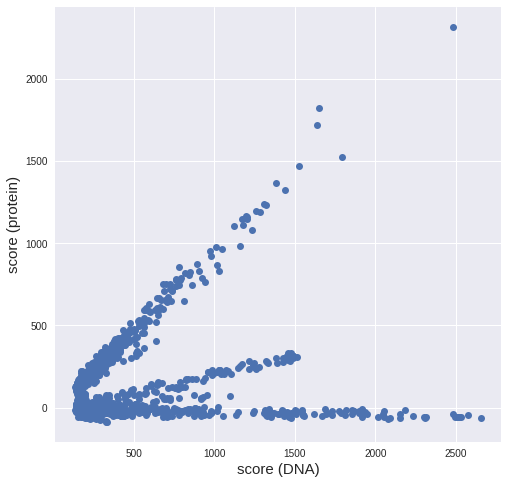

bmet


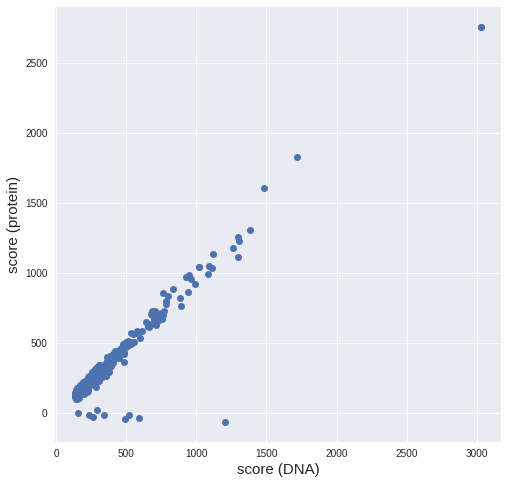

gm03779


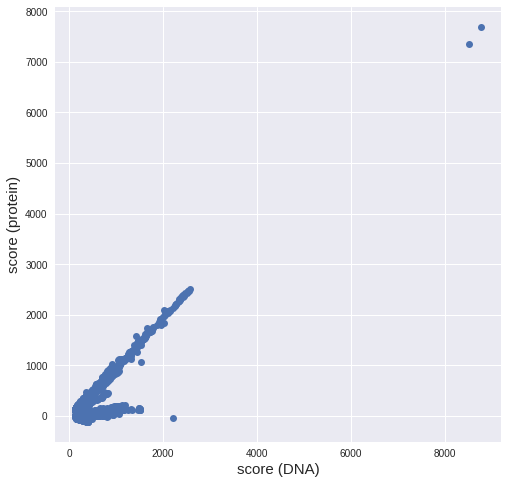

bpf


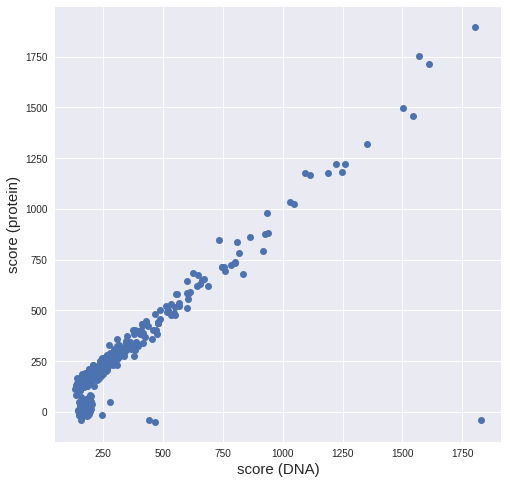

bpu


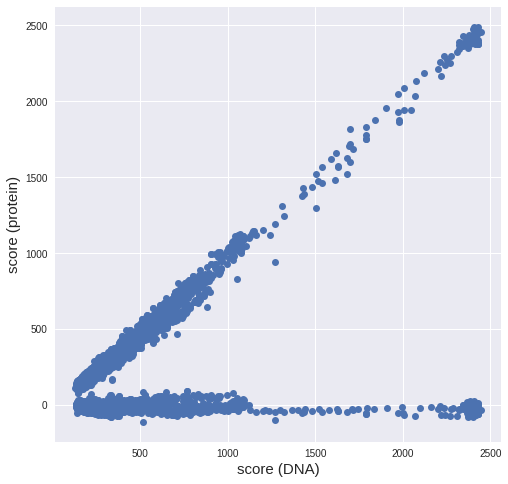

gm03784


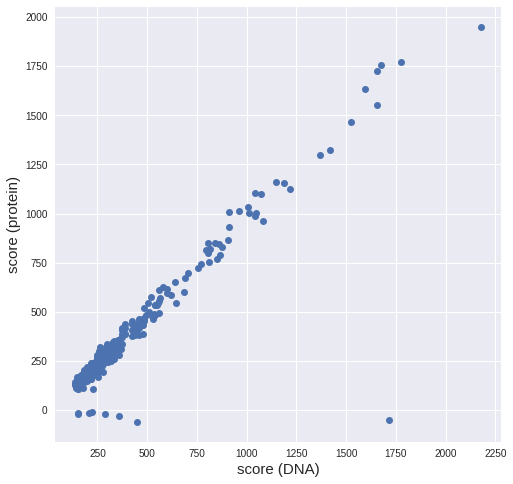

bacl


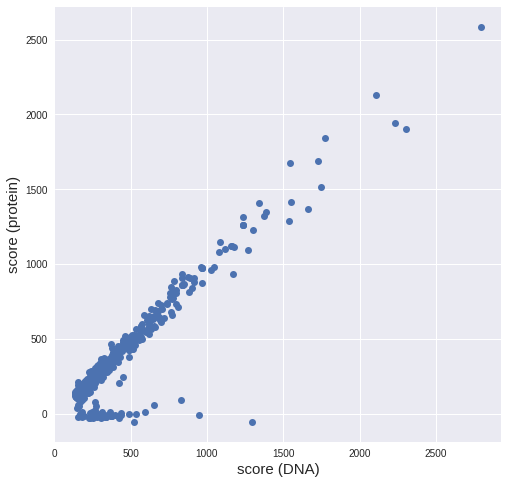

baci


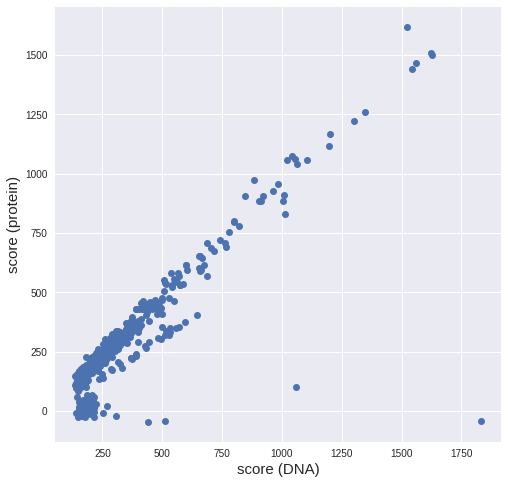

gm03786


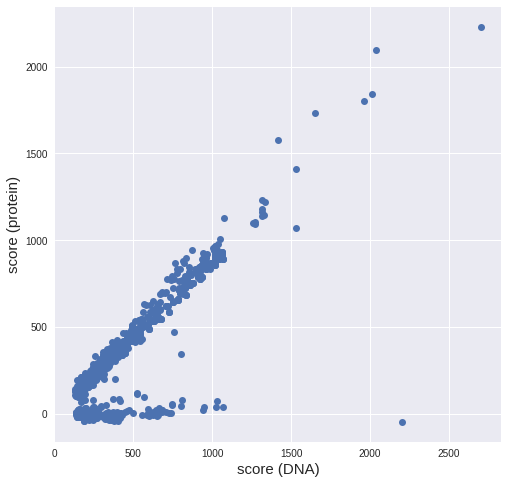

bjs


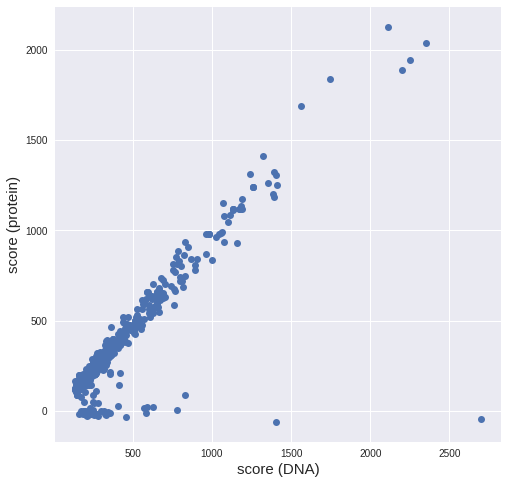

gm03787


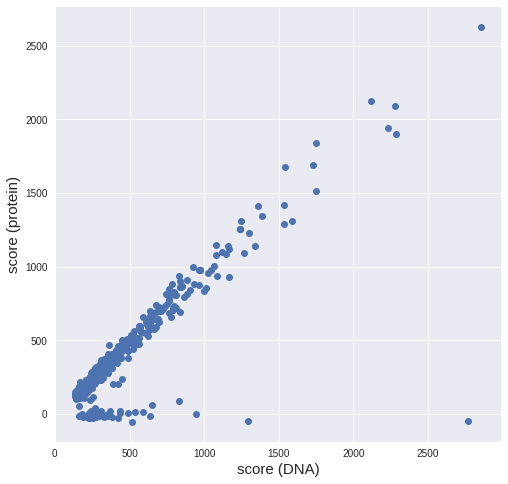

gm03788


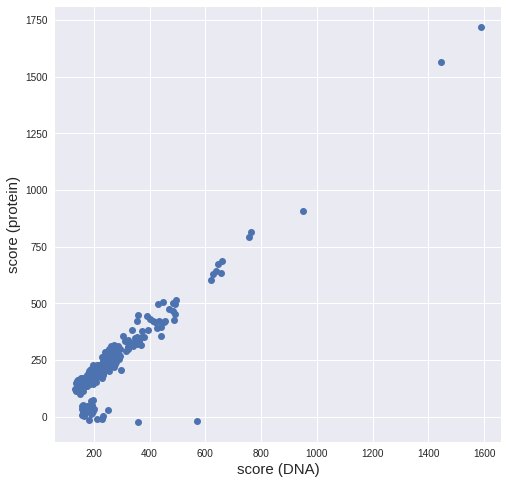

gm03789


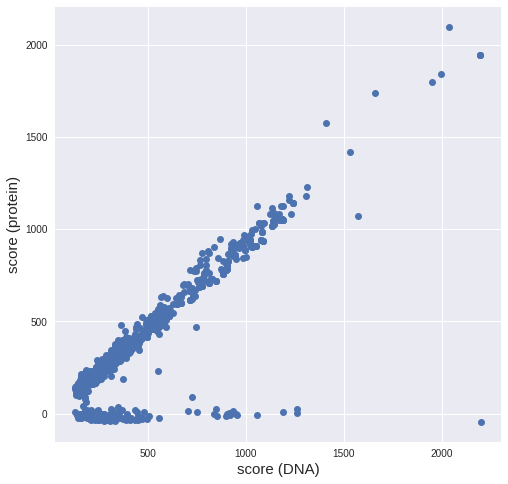

gm03790


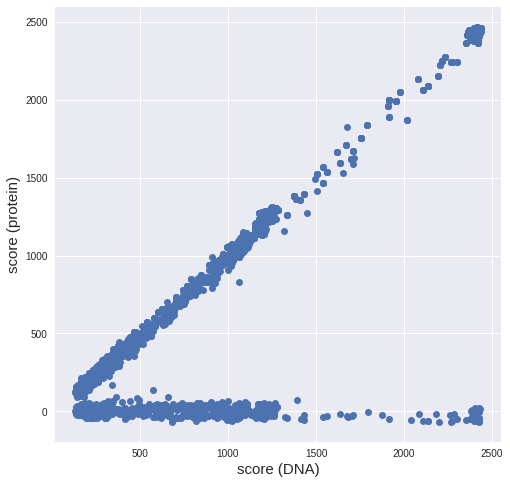

gm03791


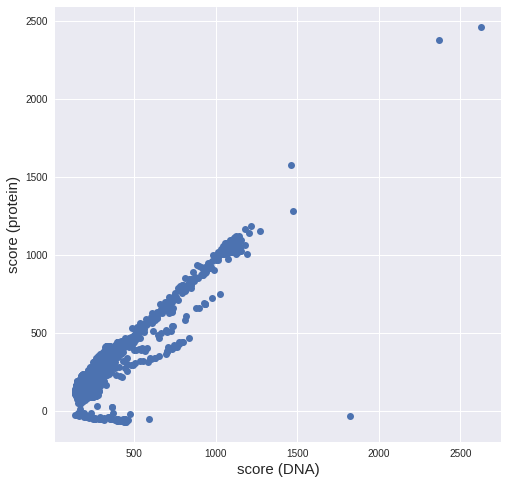

gm03792


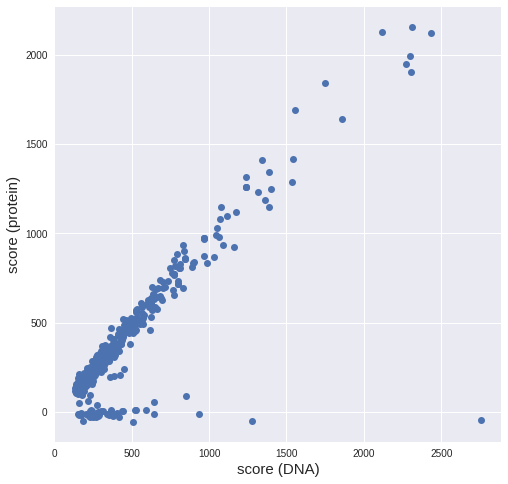

bay


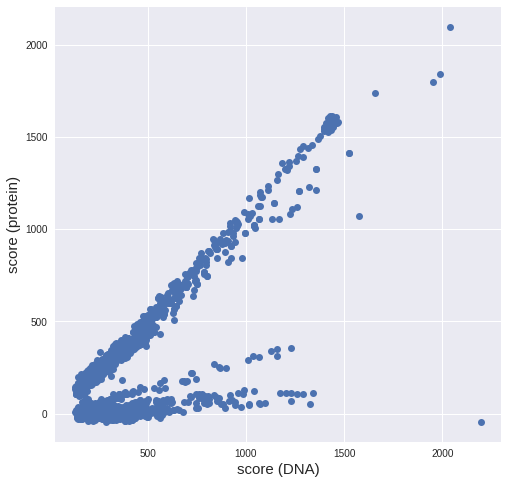

bae


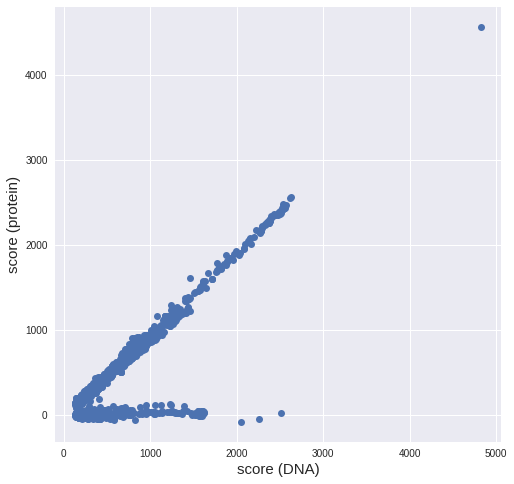

bli


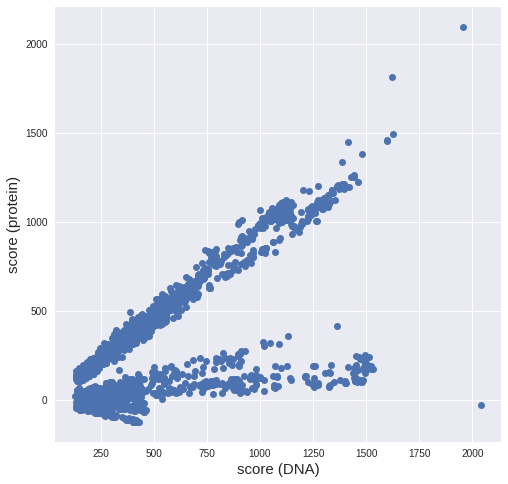

bsu


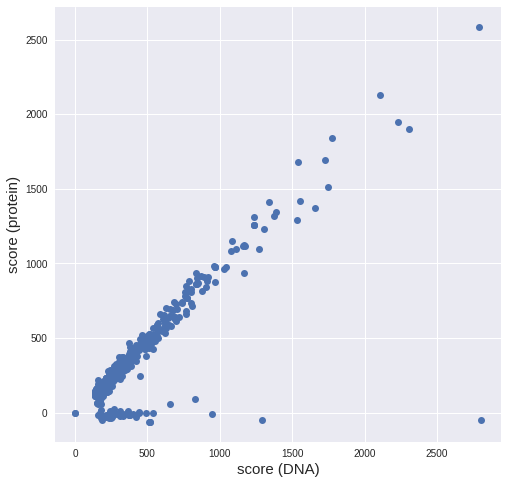

In [3]:
for strain in strain_lst:
    print(strain)
    filepath="./out/{}/{}_ovr.csv".format(target, strain)
    ovr_df=pd.read_csv(filepath)
    filtered_df=ovr_df[ovr_df["olength"]>100]
    plt.figure(figsize=(8,8))
    plt.plot(filtered_df["score_dna"],filtered_df["score_pro"], 'o')
    plt.xlabel("score (DNA)", fontsize=15)
    plt.ylabel("score (protein)", fontsize=15)
    plt.show()

In [ ]:
strain="ble"
filepath="./out/{}/{}_ovr.csv".format(target, strain)
ovr_df=pd.read_csv(filepath)
msk=(ovr_df["score_pro"]<50) 
ovr_df[msk].sort_values(by=["score_dna"], ascending=False)[["qfamily", "sfamily"]]

In [ ]:
family_tpllst=[]
for qfamily, sfamily in zip(ovr_df[msk]["qfamily"],ovr_df[msk]["sfamily"]):
    family_tpllst.append((qfamily, sfamily))
family_tplset=set(family_tpllst)
print(len(family_tplset))

In [ ]:
family_tpl=("family15051", "family5179")
for family in family_tpl:
    print(family2description[family])

In [4]:
dct_lst=[]
for strain in strain_lst:
    filepath="./out/{}/{}_ovr.csv".format(target, strain)
    ovr_df=pd.read_csv(filepath)
    dct_lst+=ovr_df.to_dict("records")
all_df=pd.DataFrame(dct_lst)
all_df=all_df[ovr_df.columns]
print(all_df.shape)
all_df.head()

(127220, 24)


,overlap_id,ofirst,olast,olength,start_per,end_per,qfamily,sfamily,qorf_id,sorf_id,...,qstart_pro,qend_pro,sstart_dna,send_dna,sstart_pro,send_pro,region_id,chr_name,score_dna,score_pro
0,0,6562,6619,58,0.000000,1.0,family2808,"family2217,family2807",btk:BT9727_0861,gm03759:CY96_RS27115,...,47,65,496,554,166,184,1310,gm03759:plasmid-pBb-2,91.1,70.0
1,1,10593,10607,15,0.884298,1.0,family8022,family7498,gm03781:MA06_RS26495,gm03759:CY96_RS27130,...,134,138,0,15,0,5,4043,gm03759:plasmid-pBb-2,27.5,-10.0
2,2,10593,10607,15,0.884298,1.0,family8534,family7498,gm03781:MA06_RS26495,gm03759:CY96_RS27130,...,134,138,0,15,0,5,4044,gm03759:plasmid-pBb-2,27.5,-10.0
3,3,17298,17437,140,0.000000,1.0,family4626,family4625,bae:BATR1942_RS07500,gm03759:CY96_RS27160,...,44,90,130,270,44,90,2671,gm03759:plasmid-pBb-2,202.2,178.0
4,4,17303,17440,138,0.000000,1.0,family4628,family4625,bpf:BPOF4_RS16105,gm03759:CY96_RS27160,...,46,91,135,273,45,91,2686,gm03759:plasmid-pBb-2,185.3,168.0


In [ ]:
all_df[all_df["qfamily"]=="family1148"]

In [5]:
clusterFilepath="../data/{}/cluster.tsv".format(target)
cluster_df=pd.read_csv(clusterFilepath, sep="\t")

family2lineage={}
family2description={}
for _, row in cluster_df.iterrows():
    family2lineage[row["family"]]=row["lineage"]
    family2description[row["family"]]=row["Description"]
print(len(family2lineage))

/home/mitsuki/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,5,8,9,10,11,17,19,20,21,22,25,27,28,29,30,31,32,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


19892


In [ ]:
cluster_df[cluster_df["family"]=="family3497"]

In [ ]:
nega_df=all_df[all_df["score_pro"]>1000]
print(nega_df.shape)
nega_df.head()

In [ ]:
nega_df.sort_values(by=["score_pro"], ascending=False)

In [6]:
high_df=all_df[(all_df["score_pro"] < 100) & (all_df["score_dna"] > 250)]  # filter high quality
print(high_df.shape)
high_df.sort_values(by=["score_dna"], ascending=False).head(10)

(9079, 24)


,overlap_id,ofirst,olast,olength,start_per,end_per,qfamily,sfamily,qorf_id,sorf_id,...,qstart_pro,qend_pro,sstart_dna,send_dna,sstart_pro,send_pro,region_id,chr_name,score_dna,score_pro
30164,3109,3058435,3060885,2451,0.0,1.0,family12603,"family4816,family3423,family3296",gm03154:BX_RS18435,btk:BT9727_2981,...,1,816,747,3198,249,1066,4385,btk:chromosome-1-1,4794.4,37.0
10424,2963,3431224,3433673,2450,0.0,1.0,family3423,"family12603,family3296",btk:BT9727_2981,gm03154:BX_RS18435,...,250,1066,0,2450,0,816,1845,gm03154:chromosome-1-1,4794.4,37.0
10425,2964,3431224,3433673,2450,0.0,1.0,family4816,"family12603,family3296",btk:BT9727_2981,gm03154:BX_RS18435,...,250,1066,0,2450,0,816,1846,gm03154:chromosome-1-1,4794.4,37.0
42952,4403,2982807,2985257,2451,0.0,1.0,family12603,"family4816,family3423,family3296",gm03154:BX_RS18435,bwe:BCERKBAB4_RS14865,...,1,816,747,3198,249,1066,5821,bwe:chromosome-1-1,4552.4,22.5
33622,225,449821,452271,2451,0.0,1.0,family12603,"family4816,family3423,family3296",gm03154:BX_RS18435,bty:BTOYO_RS02330,...,1,816,747,3198,249,1066,4909,bty:chromosome-1-1,4440.0,49.5
3319,3319,2925849,2928297,2449,0.0,1.0,family12603,"family4816,family3423,family3296",gm03154:BX_RS18435,gm03759:CY96_RS14690,...,1,816,747,3196,249,1065,4855,gm03759:chromosome-1-1,4431.2,43.0
16863,3515,3189232,3191680,2449,0.0,1.0,family12603,"family4816,family3423,family3296",gm03154:BX_RS18435,bce:BC3211,...,1,816,747,3196,249,1065,5414,bce:chromosome-1-1,4423.6,38.0
27353,298,454014,455570,1557,0.0,1.0,family14113,family2365,gm03154:BX_RS05035,btk:BT9727_0388,...,1,519,369,1926,123,642,5546,btk:chromosome-1-1,3042.8,-48.0
8010,549,945158,946715,1558,0.0,1.0,family2365,family14113,btk:BT9727_0388,gm03154:BX_RS05035,...,124,642,0,1558,0,519,1443,gm03154:chromosome-1-1,3042.8,-48.0
487,487,294999,296555,1557,0.0,1.0,family14113,family2365,gm03154:BX_RS05035,gm03759:CY96_RS01445,...,1,519,369,1926,123,642,5756,gm03759:chromosome-1-1,2815.2,-35.0


In [ ]:
for family in ("family5330", "family2454"):
    print("{}:{}".format(family, family2description[family]))

In [ ]:
all_df[all_df["qorf_id"]=="gm03840:BBSC_RS07120"]

In [9]:
def intersection(family1, family2, cluster_df):
    filter_df=cluster_df[cluster_df["family"].isin([family1,family2])][strain_lst]
    assert filter_df.shape[0]==2
    msk= (filter_df.isnull().sum(axis=0)==0)
    return msk.sum()

dct_lst=[]
junk_tpl=("transposase", "insertion", "transposon")

for _, row in high_df.iterrows():
    qfamily=row["qfamily"].split(",")[0]
    sfamily=row["sfamily"].split(",")[0]
    
    dct={}
    dct["overlap_id"]=row["overlap_id"]
    dct["qfamily"]=qfamily
    dct["sfamily"]=sfamily
    dct["qfamily_lineage"]= family2lineage[qfamily]
    dct["sfamily_lineage"]= family2lineage[sfamily]
    dct["qfamily_description"]= family2description[qfamily]
    dct["sfamily_description"]= family2description[sfamily]
    dct["intersection"]=intersection(sfamily, qfamily, cluster_df)
    
    
#    dct["qjunk"]=0
#    dct["sjunk"]=0
#    for junk in junk_tpl:
#        if junk in dct["qfamily_description"].lower():
#            dct["qjunk"]=1
#        if junk in dct["sfamily_description"].lower():
#            dct["sjunk"]=1
    dct_lst.append(dct)

tmp_df=pd.DataFrame(dct_lst)
#tmp_df["junk"]=tmp_df["qjunk"]+tmp_df["sjunk"]
tmp_df=tmp_df[["overlap_id", "qfamily", "sfamily", "qfamily_lineage", "sfamily_lineage", "intersection", 
               "qfamily_description", "sfamily_description"]]
#tmp_df[tmp_df["junk"]==0]

In [ ]:
high_df.sort_values(by=["score_dna"], ascending=False).head()

In [ ]:
cluster_df[cluster_df["family"].isin(["family294", "family295"])][["family"]+strain_lst]

In [ ]:
tmp_df[(tmp_df["intersection"]==0) & (tmp_df["qfamily_lineage"]!=1) & (tmp_df["sfamily_lineage"]!=1)]

In [ ]:
cluster_df[cluster_df["family"].isin(["family22"])][["family", "lineage"]+strain_lst]

In [ ]:
all_df[all_df["qfamily"]=="family3145"]

In [ ]:
all_df[all_df["qfamily"]=="family2591"]

In [ ]:
ovr_df[ovr_df["qfamily"]"family4618"]

In [ ]:
high_df[high_df["qfamily"]=="family3497"]

In [ ]:
high_df[high_df["overlap_id"]==829]

In [11]:
join_df=pd.merge(tmp_df, high_df, on="overlap_id")
join_df[(join_df["qfamily_lineage"]>1) & (join_df["sfamily_lineage"]>1)].sort_values(by=["score_dna"], ascending=False)

,overlap_id,qfamily_x,sfamily_x,qfamily_lineage,sfamily_lineage,intersection,qfamily_description,sfamily_description,ofirst,olast,...,qstart_pro,qend_pro,sstart_dna,send_dna,sstart_pro,send_pro,region_id,chr_name,score_dna,score_pro
9845,4307,family11020,family7862,3,14,0,Hypothetical protein,Spore coat protein GerQ,1852168,1853942,...,2,583,2163,3938,721,1312,3888,bpu:chromosome-1-1,2419.8,-67.0
18453,5159,family11020,family7862,3,14,0,Hypothetical protein,Spore coat protein GerQ,1853137,1854881,...,1,584,1224,2969,408,989,3882,bpu:chromosome-1-1,2409.4,-7.0
3656,3898,family11020,family7862,3,14,0,Hypothetical protein,Spore coat protein GerQ,4097087,4098437,...,14,467,39,1390,13,463,8377,gm03154:chromosome-1-1,1819.8,-10.0
3545,2941,family11718,family3227,2,9,2,Hypothetical protein,Pyrroline-5-carboxylate reductase,1846079,1847410,...,311,751,0,1332,0,444,5116,ble:chromosome-1-1,1729.9,-32.0
16804,588,family11764,family11370,2,2,0,Hypothetical protein,Hypothetical protein,1369740,1371035,...,5,435,21,1317,7,439,2145,gm03784:chromosome-1-1,1716.4,-49.5
7441,2272,family7862,family11020,14,3,0,Spore coat protein GerQ,Hypothetical protein,2416389,2417545,...,1,385,484,1641,162,547,4462,bcy:chromosome-1-1,1681.4,-7.0
16827,627,family8175,family10124,8,4,2,Cysteine-rich protein YhjQ,Hypothetical protein,52275,53269,...,741,1074,1383,2378,461,792,3869,bmq:plasmid-pBM500-4,1340.6,-20.0
4811,2483,family11020,family7862,3,14,0,Hypothetical protein,Spore coat protein GerQ,1859098,1860015,...,239,547,0,918,0,306,6730,gm03790:chromosome-1-1,1260.5,31.5
13582,2631,family6038,family7950,31,13,12,Spore coat protein GerQ,Predicted in CGM,1859098,1860015,...,822,1128,0,918,0,306,6666,gm03790:chromosome-1-1,1246.0,-31.0
5555,3489,family11718,family3227,2,9,2,Hypothetical protein,Pyrroline-5-carboxylate reductase,1860466,1861362,...,370,669,0,897,0,299,6666,gm03790:chromosome-1-1,1235.8,47.0


In [17]:
join_df[["qfamily_x", "sfamily_x", "qfamily_y", "sfamily_y"]]

,qfamily_x,sfamily_x,qfamily_y,sfamily_y
0,family14113,family2365,family14113,family2365
1,family14113,family2365,family10770,family14583
2,family10770,family14583,family14113,family2365
3,family10770,family14583,family10770,family14583
4,family4870,family7519,family4870,family7519
5,family4870,family7519,family10770,family14583
6,family10770,family14583,family4870,family7519
7,family10770,family14583,family10770,family14583
8,family14829,family9558,family14829,family9558
9,family11763,family9558,family11763,family9558


In [ ]:
join_df[join_df["overlap_id"]==829]

In [ ]:
join_df[join_df["qfamily_x"]=="family1148"]

In [16]:
family_tpl=("family11020", "family7862")
cluster_df[cluster_df["family"].isin(family_tpl)][["family"]+strain_lst].dropna(axis=1, how="all")

,family,gm03759,bce,bcy,gm03781,btk,bty,bwe,gm03779,bacl,gm03786,bjs,gm03787,gm03789,gm03792,bay,bae,bsu
7868,family7862,gm03759:CY96_RS09150,bce:BC2030,bcy:BCER98_RS08030,gm03781:MA06_RS24665,btk:BT9727_1861,bty:BTOYO_RS23125,bwe:BCERKBAB4_RS09775,gm03779:NG74_RS16905,bacl:BS34A_39200,gm03786:OY17_RS00290,NaN,NaN,gm03789:SB24_RS12085,NaN,bay:RBAM_RS16585,bae:BATR1942_RS15265,bsu:BSU36070
11019,family11020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bjs:MY9_RS18190,gm03787:BSLM_RS17710,NaN,gm03792:QF06_RS16445,NaN,NaN,NaN


In [ ]:
high_df[high_df["qfamily"]=="family4713"]

In [ ]:
cluster_df[cluster_df["family"].isin(["family3145", "family2591"])][["family", "lineage"]+strain_lst]

In [ ]:
len(strain_lst)

In [ ]:
family_tpl=("family3145", "family2591")
for family in family_tpl:
    print("{}:{}".format(family))

In [ ]:
column_lst=['overlap_id', 'qfamily_x', 'sfamily_x', 
                        'qfamily_lineage', 'sfamily_lineage', 'intersection', 
                        'qfamily_description', 'sfamily_description', 
                        'olength', 'score_dna', 'score_pro']
join_df[column_lst].sort_values(by=["score_dna"], ascending=False).head(20)

In [ ]:
join_df[join_df["qfamily_lineage"]>1].sort_values(by=["score_dna"], ascending=False)

In [ ]:
sfamily

In [ ]:
strainFilepath="/home/mitsuki/altorf/mbgd/data/strain.lst"
strain_lst=[s.strip() for s in open(strainFilepath, 'r').readlines()]

In [ ]:
for strain in strain_lst[:5]:
    filepath="/home/mitsuki/altorf/mbgd/analyze/out/{}_ovr.csv".format(strain)
    df=pd.read_csv(filepath)
    filtered_df=df[df["olength"]>100]
    plt.figure(figsize=(8,8))
    plt.plot(filtered_df["score_dna"],filtered_df["score_pro"], 'o')
    plt.show()

In [ ]:
filepath="/home/mitsuki/altorf/mbgd/analyze/out/test_eab_ovr.csv"
all_df=pd.read_csv(filepath)
all_df.head()

In [ ]:
filepath="../arxiv/ecoli/out/{}_out.csv".format(strain_lst[0])
with open(filepath, 'r') as f:
    column_lst=f.readline().strip().split(',')
all_df=pd.DataFrame(columns=column_lst)

for strain in strain_lst:
    filepath="../arxiv/ecoli/out/{}_out.csv".format(strain)
    df=pd.read_csv(filepath)
    all_df=pd.concat([all_df, df])
print(all_df.shape)
all_df.head()

In [ ]:
filtered_df=all_df[all_df["olength"]>100]
print(filtered_df.shape)
filtered_df.head()

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(filtered_df["score_gen"],filtered_df["score_pro"], 'o')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-100,500)
#plt.ylim(-100,500)

In [ ]:
columns_lst=["sstrain", "qstrain", "region_id"]
filtered_df[filtered_df["score_pro"]<0]
#filtered_df[(filtered_df["score_pro"]<0) & (filtered_df["olength"]>100)][columns_lst]

In [ ]:
filtered_df.columns

In [ ]:
xClm="score_gen"
yClm="score_pro"
g=sns.jointplot(xClm, yClm, data=filtered_df, stat_func=None)
g=g.set_axis_labels("score (DNA)", "score (protein)", fontsize=15)
plt.show()

In [ ]:
dir(g.size)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(filtered_df["score_gen"],filtered_df["score_pro"], 'o')
plt.xlabel("score (DNA)", fontsize=20)
plt.ylabel("score (protein)", fontsize=20)
plt.xlim(-100,500)
plt.ylim(-100,500)

In [ ]:
key_set=set()
for _,row in tmp_df.iterrows():
    key_set.add((row["qfamily"],row["sfamily"]))
print(tmp_df.shape)
len(key_set)

In [ ]:
tmp_df=df[(df["score_gen"]>200) & (df["score_pro"]<0)]
tmp_df.shape
tmp_df.head()

In [ ]:
tmp_df.to_csv("ecg_out_filtered.csv", index=False)

In [ ]:
tmp_df.loc[19,:]

In [ ]:
sns.distplot(df["score"], kde=False)

In [ ]:
df[(df["score"]<-20) & (df["olength"]>50)]

In [ ]:
min(df[(df["score"]<0) & (df["olength"]>20)]["score"])

In [ ]:
row=df.iloc[361,:]
row

In [ ]:
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist
from Bio.pairwise2 import format_alignment
import sys
sys.path.append("/home/mitsuki/altorf/mbgd/blastn")
from create_query import extract_sequence

matrix = matlist.blosum62
gap_open=-10
gap_extend=-0.5

In [ ]:
seq=extract_sequence(row["qseqid"],dtype="proteinseq")
qseq=seq[max(0,row["qfirst_pro"]):min(len(seq)-1,row["qlast_pro"])]#-1 to avoid inclusion of '*'
seq=extract_sequence(row["chr_name"].split(':')[0]+':'+row["cds_name"],dtype="proteinseq")
sseq=seq[max(0,row["sfirst_pro"]):min(len(seq)-1,row["slast_pro"])]

print(row["qfirst_pro"],row["qlast_pro"])
print(qseq)
print(row["sfirst_pro"],row["slast_pro"])
print(sseq)
print()

alns=pairwise2.align.globalds(qseq, sseq, matrix, gap_open, gap_extend)
for a in alns:
    print(format_alignment(*a))